## Replicable Plots

In [99]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = 'ACSMobility_mfopt_approx.pkl'
df = pd.read_pickle(file)
scenario = file.split('_')[0]
separate_plots = False
# ONE_COLUMN_CONSTANTS = {
#     "FIGSIZE": (6, 4),
#     "TITLE_FONTSIZE": 14,
#     "LABEL_FONTSIZE": 12,
#     "TICKS_FONTSIZE": 10,
#     "LINE_WIDTH": 3,
#     "MARKER": 'o'
# }

# TWO_COLUMN_CONSTANTS = {
#     "FIGSIZE": (14, 4),
#     "TITLE_FONTSIZE": 14,
#     "LABEL_FONTSIZE": 12,
#     "TICKS_FONTSIZE": 10,
#     "LINE_WIDTH": 3,
#     "MARKER": 'o'
# }

# TWO_COLUMN_LARGE_CONSTANTS = {
#     "FIGSIZE": (14, 6),
#     "TITLE_FONTSIZE": 14,
#     "LABEL_FONTSIZE": 12,
#     "TICKS_FONTSIZE": 10,
#     "LINE_WIDTH": 3,
#     "MARKER": 'o'
# }
if separate_plots:

    FIGSIZE_ONE_COLUMN = (6, 4)
    FIGSIZE_TWO_COLUMN = (14, 4)
    FIGSIZE_TWO_COLUMN_LARGE = (14, 6)
    DPI = 120
    TITLE_FONTSIZE = 14
    LABEL_FONTSIZE = 12
    TICKS_FONTSIZE = 10
    SUPER_TITLE_FONTSIZE = 16
    LINE_WIDTH = 3
    MARKER_1 = 'o'
    PLOT_STYLE = "whitegrid"

    sns.set(style=PLOT_STYLE)

    def epsilons_as_lambda_changes(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.tight_layout()
        plt.show()

    def thresholds_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.figure(figsize=FIGSIZE_ONE_COLUMN, dpi=DPI)
        
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)
        
        plt.show()

    def combined_metrics_and_thresholds_plot(df, scenario):
        metrics = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

        fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
        best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
        for metric in metrics:
            fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics.index(metric)])
        
        plt.figure(figsize=FIGSIZE_TWO_COLUMN_LARGE, dpi=DPI)

        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 3, i)
            sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
            plt.title(f'{metric} vs $\\lambda$ ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
            plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
            plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
            plt.xticks(fontsize=TICKS_FONTSIZE)
            plt.yticks(fontsize=TICKS_FONTSIZE)

        fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
        fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

        plt.subplot(2, 3, 6)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
        plt.title(f'$\\tau$ as $\\lambda$ Changes ({scenario} Scenario)', fontsize=TITLE_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)
        plt.legend(fontsize=LABEL_FONTSIZE)
        plt.grid(True)

        plt.tight_layout()
        plt.show()


    def best_objective_value_as_lambda_changes(df, scenario):
        fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
        fair_overall_df = fair_overall_df.sort_values('lambda')
        sns.set(style=PLOT_STYLE)

        plt.figure(figsize=FIGSIZE_TWO_COLUMN, dpi=DPI)

        plt.subplot(1, 3, 1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['best_objective_value'], marker=MARKER_1, color="blue", linewidth=LINE_WIDTH)
        plt.title('Objective Value vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('Objective', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 2)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['accuracy'], marker=MARKER_1, color='orange', linewidth=LINE_WIDTH)
        plt.title('Accuracy vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('ACC (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        plt.subplot(1, 3, 3)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df['f1'], marker=MARKER_1, color='green', linewidth=LINE_WIDTH)
        plt.title('F1 vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel('F1 (Overall)', fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

        # plt.suptitle(f'Changing the Lambda Parameter in ApproxThresh Objective Function for {scenario} Scenario', fontsize=SUPER_TITLE_FONTSIZE)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        plt.show()

    epsilons_as_lambda_changes(df, scenario)
    thresholds_as_lambda_changes(df, scenario)
    best_objective_value_as_lambda_changes(df, scenario)
    combined_metrics_and_thresholds_plot(df, scenario)

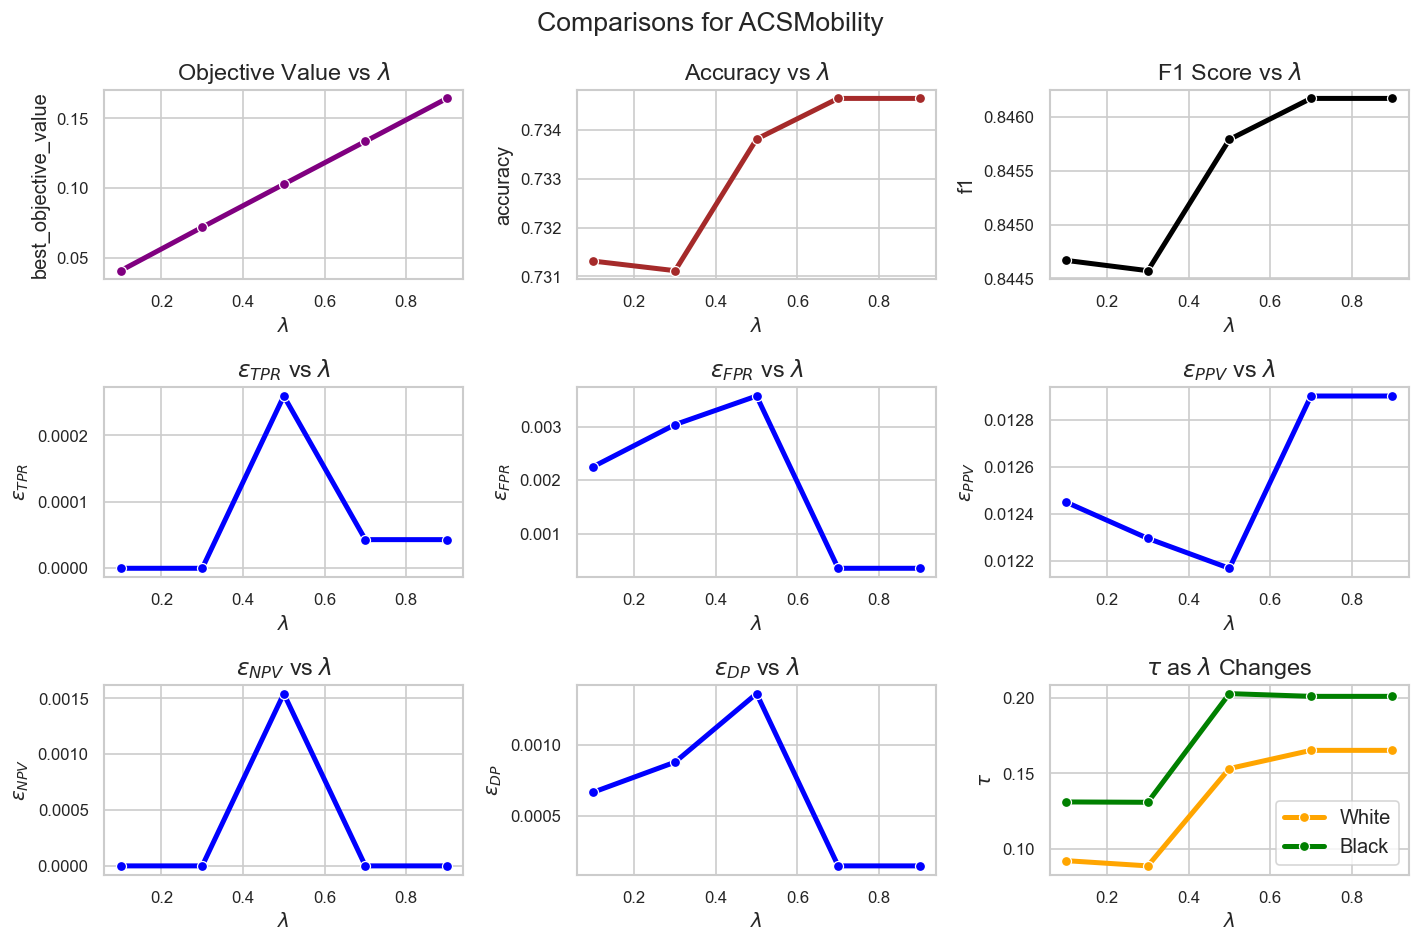

In [102]:
FIGSIZE_THREE_COLUMN = (12, 8)
DPI = 120
TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 10
LINE_WIDTH = 3
MARKER_1 = 'o'
PLOT_STYLE = "whitegrid"

def combined_metrics_plot(df, scenario):
    metrics_overall = ['best_objective_value', 'accuracy', 'f1']
    colors_overall = ['purple', 'brown', 'black']
    titles_overall = ['Objective Value', 'Accuracy', 'F1 Score']

    metrics_epsilon = ['$\\epsilon_{TPR}$', '$\\epsilon_{FPR}$', '$\\epsilon_{PPV}$', '$\\epsilon_{NPV}$', '$\\epsilon_{DP}$']

    fair_overall_df = df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall')]
    fair_overall_df = fair_overall_df.sort_values('lambda')
    best_epsilons = fair_overall_df['best_epsilons'][fair_overall_df['best_epsilons'].notnull()]
    for metric in metrics_epsilon:
        fair_overall_df[metric] = best_epsilons.apply(lambda x: x[1][2][metrics_epsilon.index(metric)])
    
    fair_overall_df['thresholds_group_1'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(1) if x else None)
    fair_overall_df['thresholds_group_2'] = fair_overall_df['best_thresholds'].apply(lambda x: x.get(2) if x else None)

    plt.figure(figsize=FIGSIZE_THREE_COLUMN, dpi=DPI)
    
    for i in range(3):
        plt.subplot(3, 3, i+1)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metrics_overall[i]], marker=MARKER_1, color=colors_overall[i], linewidth=LINE_WIDTH)
        plt.title(titles_overall[i] + ' vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel(metrics_overall[i], fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

    for i, metric in enumerate(metrics_epsilon, 1):
        plt.subplot(3, 3, i+3)
        sns.lineplot(x=fair_overall_df['lambda'], y=fair_overall_df[metric], color='blue', marker=MARKER_1, linewidth=LINE_WIDTH)
        plt.title(f'{metric} vs $\\lambda$', fontsize=TITLE_FONTSIZE)
        plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
        plt.ylabel(metric, fontsize=LABEL_FONTSIZE)
        plt.xticks(fontsize=TICKS_FONTSIZE)
        plt.yticks(fontsize=TICKS_FONTSIZE)

    plt.subplot(3, 3, 9)
    sns.lineplot(x=fair_overall_df['lambda'], color='orange', y=fair_overall_df['thresholds_group_1'], marker=MARKER_1, linewidth=LINE_WIDTH, label='White')
    sns.lineplot(x=fair_overall_df['lambda'], color='green', y=fair_overall_df['thresholds_group_2'], marker=MARKER_1, linewidth=LINE_WIDTH, label='Black')
    plt.xlabel('$\\lambda$', fontsize=LABEL_FONTSIZE)
    plt.ylabel('$\\tau$', fontsize=LABEL_FONTSIZE)
    plt.title(f'$\\tau$ as $\\lambda$ Changes', fontsize=TITLE_FONTSIZE)
    plt.xticks(fontsize=TICKS_FONTSIZE)
    plt.yticks(fontsize=TICKS_FONTSIZE)
    plt.legend(fontsize=LABEL_FONTSIZE)
    plt.grid(True)

    plt.suptitle(f'Comparisons for {scenario}', fontsize=SUPER_TITLE_FONTSIZE)

    plt.tight_layout()
    plt.savefig('figs/' + scenario + '_full_fig.pdf', bbox_inches='tight', dpi=120, format='pdf')
    # plt.show()

combined_metrics_plot(df, scenario)

In [96]:
def select_model_helper(df):
    fair_overall_df = df[(df['dataset_subset'] == 'overall') & (df['method'] == 'fair')]
    vals_fairness = fair_overall_df['best_epsilons'].apply(lambda x: sum(x[1][2]))
    vals_utility = fair_overall_df['f1']
    print(vals_fairness)
    print(vals_utility)
    # return the last idxmax if there are multiple
    m = max(vals_utility)
    lambdas = list(fair_overall_df.loc[[i for i, j in vals_utility.items() if j == m]]['lambda'])
    print(lambdas)
    return lambdas
 
lambdas = select_model_helper(df)

3     0.015373
6     0.016214
9     0.018905
12    0.013446
15    0.013446
Name: best_epsilons, dtype: float64
3     0.844667
6     0.844572
9     0.845793
12    0.846176
15    0.846176
Name: f1, dtype: float64
[0.7, 0.9]


### Custom lambdas
Set lambda values in the `lambdas` variable based on your interpretation of the `select_model_helper` results - its subjective!

In [97]:
lambdas = [0.9]

In [98]:
def eo_difference(df, groups):
    tpr_1 = df['tpr'][df['dataset_subset'] == groups[0]].iloc[0]
    tpr_2 = df['tpr'][df['dataset_subset'] == groups[1]].iloc[0]

    fpr_1 = df['fpr'][df['dataset_subset'] == groups[0]].iloc[0]
    fpr_2 = df['fpr'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(tpr_1 - tpr_2) + abs(fpr_1 - fpr_2)

def demographic_parity_difference(df, groups):
    selection_rate_1 = df['selection_rate'][df['dataset_subset'] == groups[0]].iloc[0]
    selection_rate_2 = df['selection_rate'][df['dataset_subset'] == groups[1]].iloc[0]

    return abs(selection_rate_1 - selection_rate_2)

def predictive_rate_parity_difference(df, groups, negative_class=False):
    precision_1 = df['precision'][df['dataset_subset'] == groups[0]].iloc[0]
    precision_2 = df['precision'][df['dataset_subset'] == groups[1]].iloc[0]
    
    if negative_class:
        npv_1 = df['npv'][df['dataset_subset'] == groups[0]].iloc[0]
        npv_2 = df['npv'][df['dataset_subset'] == groups[1]].iloc[0]

        return abs(precision_1 - precision_2) + abs(npv_1 - npv_2)
    
    return abs(precision_1 - precision_2)

def calculate_fairness_metrics(df, lambdas, groups=['1','2']):
    for l in lambdas:
        group_wise_df = df[(df['method'] == 'fair') & (df['dataset_subset'].isin(groups)) & (df['lambda'] == l)]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('FAIR METRICS')
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))
        print('-----')
        print('ORIGINAL METRICS')
        group_wise_df = df[(df['method'] == 'original') & (df['dataset_subset'].isin(groups))]
        eq_odds = eo_difference(group_wise_df, groups)
        dp = demographic_parity_difference(group_wise_df, groups)
        prp = predictive_rate_parity_difference(group_wise_df, groups)
        print('DP ' + str(round(dp, 4)))
        print('EQ_Odds ' + str(round(eq_odds, 4)))
        print('PRP ' + str(round(prp, 4)))
        print('-----')
        total = eq_odds + dp + prp
        print('Total: ' + str(round(total,4)))
        # also print AUC and F1 and accuracy
        print('FAIR OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'fair') & (df['dataset_subset'] == 'overall') & (df['lambda'] == l)]['accuracy'].iloc[0],4)))
        print('-----')
        print('ORIGINAL OVERALL')
        print('AUC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['AUC'].iloc[0],4)))
        print('F1: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['f1'].iloc[0],4)))
        print('ACC: ' + str(round(df[(df['method'] == 'original') & (df['dataset_subset'] == 'overall')]['accuracy'].iloc[0],4)))
        print('-----')

        

calculate_fairness_metrics(df, lambdas)

FAIR METRICS
DP 0.0002
EQ_Odds 0.0004
PRP 0.0129
-----
Total: 0.0134
-----
ORIGINAL METRICS
DP 0.0562
EQ_Odds 0.1473
PRP 0.0144
-----
Total: 0.2179
FAIR OVERALL
AUC: 0.7406
F1: 0.8462
ACC: 0.7346
-----
ORIGINAL OVERALL
AUC: 0.7406
F1: 0.8528
ACC: 0.7628
-----
